# Pymaceuticals Inc.

# Analysis

Observed Trend 1:

Based on the data given, Capomulin and Ramicane are the only 2 drugs that reduce tumor volume

Observed Trend 2:

Ketapril tend to has the least effect on tumor volume reduction

Observed Trend 3:

Placebo tend to has the highest metastatic speed during treatment

In [216]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
# Setting the file path for clinical trial data file
c_data_file="clinicaltrial_data.csv"

# Setting the file path for mouse drug data file
m_data_file="mouse_drug_data.csv"

# Reading the csv file
c_data_df=pd.read_csv(c_data_file)
m_data_df=pd.read_csv(m_data_file)

# Combining the data files to one single dataframe
combined_data=pd.merge(c_data_df,m_data_df,on="Mouse ID")
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


# Tumor Response to Treatment

In [218]:
# Create new table that groupby "drug" and "timepoint" and calculate the standard error of mean for 'Tumor Volume (mm3)'
trt_df_sem = combined_data.groupby(['Drug', 'Timepoint']).aggregate({'Tumor Volume (mm3)': 'sem'})

trt_df_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [219]:
# Rename the "Tumor Volume (mm3)" column to "Standard Error"
trt_df_sem = trt_df_sem.rename(columns= {"Tumor Volume (mm3)": "Tumor Volume (mm3)-Standard Error of Mean"})

# Transpose data frame
trt_df_sem = trt_df_sem.unstack(0)

trt_df_sem

Tumor Volume (mm3)-Standard Error of Mean                      \
Drug                                      Capomulin  Ceftamin Infubinol   
Timepoint                                                                 
0                                          0.000000  0.000000  0.000000   
5                                          0.448593  0.164505  0.235102   
10                                         0.702684  0.236144  0.282346   
15                                         0.838617  0.332053  0.357705   
20                                         0.909731  0.359482  0.476210   
25                                         0.881642  0.439356  0.550315   
30                                         0.934460  0.490620  0.631061   
35                                         1.052241  0.692248  0.984155   
40                                         1.223608  0.708505  1.055220   
45                                         1.223977  0.902358  1.144427   

                                                                       \
Drug       Ketapril  Naftisol   Placebo  Propriva  Ramicane  Stelasyn   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.264819  0.202385  0.218091  0.231708  0.482955  0.239862   
10         0.357421  0.319415  0.402064  0.376195  0.720225  0.433678   
15         0.580268  0.444378  0.614461  0.466109  0.770432  0.493261   
20         0.726484  0.595260  0.839609  0.555181  0.786199  0.621889   
25         0.755413  0.813706  1.034872  0.577401  0.746991  0.741922   
30         0.934121  0.975496  1.218231  0.746045  0.864906  0.899548   
35         1.127867  1.013769  1.287481  1.084929  0.967433  1.003186   
40         1.158449  1.118567  1.370634  1.564779  1.128445  1.410435   
45         1.453186  1.416363  1.351726  1.888586  1.226805  1.576556   

                     
Drug      Zoniferol  
Timepoint            
0          0.000000  
5          0.188950  
10         0.263949  
15         0.370544  
20         0.533182  
25         0.602513  
30         0.800043  
35         0.881426  
40         0.998515  
45         1.003576

In [220]:
# Create new table that groupby "drug" and "timepoint" and calculate the mean for 'Tumor Volume (mm3)'
trt_df_mean = combined_data.groupby(['Drug', 'Timepoint']).aggregate({'Tumor Volume (mm3)': 'mean'})

# Transpose data frame
trt_df_mean = trt_df_mean.unstack(0)

trt_df_mean

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

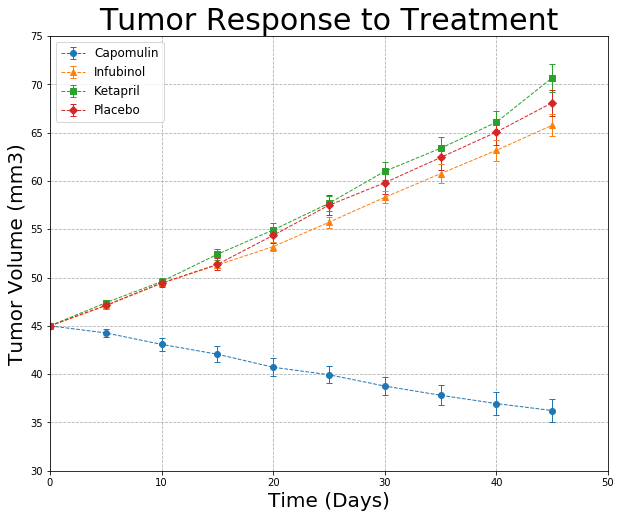

In [221]:
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,8))

# Create error bars based upon the above data
error = trt_df_sem["Tumor Volume (mm3)-Standard Error of Mean"]["Capomulin"]
cap = plt.errorbar(x_axis, trt_df_mean["Tumor Volume (mm3)"]["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = trt_df_sem["Tumor Volume (mm3)-Standard Error of Mean"]["Infubinol"]
infu = plt.errorbar(x_axis, trt_df_mean["Tumor Volume (mm3)"]["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = trt_df_sem["Tumor Volume (mm3)-Standard Error of Mean"]["Ketapril"]
keta = plt.errorbar(x_axis, trt_df_mean["Tumor Volume (mm3)"]["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = trt_df_sem["Tumor Volume (mm3)-Standard Error of Mean"]["Placebo"]
plac = plt.errorbar(x_axis, trt_df_mean["Tumor Volume (mm3)"]["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3)

# Add limits, title, x/y label, and legend Grid
plt.ylim(30, 75)
plt.xlim(0, 50)

plt.title("Tumor Response to Treatment", fontsize=30)
plt.xlabel("Time (Days)", fontsize=20)
plt.ylabel("Tumor Volume (mm3)", fontsize=20)

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)

plt.show()

# Metastatic Response to Treatment

In [222]:
# Create new table that groupby "drug" and "timepoint" and calculate the standard error of mean for 'Metastatic Sites' 
mrt_df_sem = combined_data.groupby(['Drug', 'Timepoint']).aggregate({'Metastatic Sites': 'sem'})

mrt_df_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [223]:
# Rename the "Metastatic Sites" column to "Standard Error"
mrt_df_sem = mrt_df_sem.rename(columns= {"Metastatic Sites": "Metastatic Sites-Standard Error of Mean"})

# Transpose data frame
mrt_df_sem = mrt_df_sem.unstack(0)

mrt_df_sem

Metastatic Sites-Standard Error of Mean                      \
Drug                                    Capomulin  Ceftamin Infubinol   
Timepoint                                                               
0                                        0.000000  0.000000  0.000000   
5                                        0.074833  0.108588  0.091652   
10                                       0.125433  0.152177  0.159364   
15                                       0.132048  0.180625  0.194015   
20                                       0.161621  0.241034  0.234801   
25                                       0.181818  0.258831  0.265753   
30                                       0.172944  0.249479  0.227823   
35                                       0.169496  0.266526  0.224733   
40                                       0.175610  0.289128  0.314466   
45                                       0.202591  0.286101  0.309320   

                                                                       \
Drug       Ketapril  Naftisol   Placebo  Propriva  Ramicane  Stelasyn   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.098100  0.093618  0.100947  0.095219  0.066332  0.087178   
10         0.142018  0.163577  0.115261  0.105690  0.090289  0.123672   
15         0.191381  0.158651  0.190221  0.136377  0.115261  0.153439   
20         0.236680  0.181731  0.234064  0.171499  0.119430  0.200905   
25         0.288275  0.185240  0.263888  0.199095  0.119430  0.219824   
30         0.347467  0.266667  0.300264  0.266469  0.139968  0.230641   
35         0.361418  0.330464  0.341412  0.366667  0.145997  0.240983   
40         0.315725  0.321702  0.297294  0.433903  0.160591  0.312815   
45         0.278722  0.351104  0.304240  0.428571  0.190221  0.359062   

                     
Drug      Zoniferol  
Timepoint            
0          0.000000  
5          0.077709  
10         0.109109  
15         0.111677  
20         0.166378  
25         0.236621  
30         0.248168  
35         0.285714  
40         0.299791  
45         0.286400

In [224]:
# Create new table that groupby "drug" and "timepoint" and calculate the mean for 'Metastatic Sites'
mrt_df_mean = combined_data.groupby(['Drug', 'Timepoint']).aggregate({'Metastatic Sites': 'mean'})

# Transpose data frame
mrt_df_mean = mrt_df_mean.unstack(0)

mrt_df_mean

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

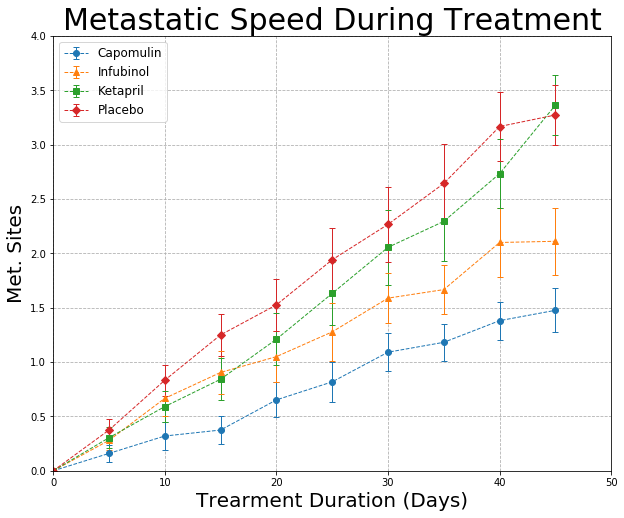

In [225]:
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,8))

# Create error bars based upon the above data
error2 = mrt_df_sem["Metastatic Sites-Standard Error of Mean"]["Capomulin"]
cap2 = plt.errorbar(x_axis, mrt_df_mean["Metastatic Sites"]["Capomulin"], yerr=error2, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = mrt_df_sem["Metastatic Sites-Standard Error of Mean"]["Infubinol"]
infu2 = plt.errorbar(x_axis, mrt_df_mean["Metastatic Sites"]["Infubinol"], yerr=error2, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = mrt_df_sem["Metastatic Sites-Standard Error of Mean"]["Ketapril"]
keta2 = plt.errorbar(x_axis, mrt_df_mean["Metastatic Sites"]["Ketapril"], yerr=error2, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3)

erro2r = mrt_df_sem["Metastatic Sites-Standard Error of Mean"]["Placebo"]
plac2 = plt.errorbar(x_axis, mrt_df_mean["Metastatic Sites"]["Placebo"], yerr=error2, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3)

# Add limits, title, x/y label, and legend Grid
plt.ylim(0, 4)
plt.xlim(0, 50)

plt.title("Metastatic Speed During Treatment", fontsize=30)
plt.xlabel("Trearment Duration (Days)", fontsize=20)
plt.ylabel("Met. Sites", fontsize=20)

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)

plt.show()

# Survival Rates

In [226]:
# Create new table that groupby "drug" and "timepoint" and calculate the standard error of mean for 'Metastatic Sites' 
sr_df = combined_data.groupby(['Drug', 'Timepoint']).aggregate({'Mouse ID': 'count'})

sr_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [227]:
# Transpose data frame
sr_df = sr_df.unstack(0)

sr_df

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

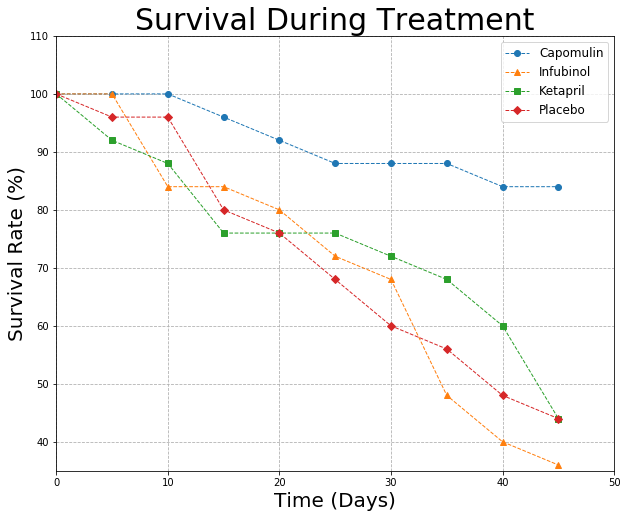

In [228]:
plt.figure(figsize=(10,8))

# Create error bars based upon the above data
cap3 = plt.errorbar(x_axis, (sr_df["Mouse ID"]["Capomulin"]/25*100), fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3)
infu3 = plt.errorbar(x_axis, (sr_df["Mouse ID"]["Infubinol"]/25*100), fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3)
keta3 = plt.errorbar(x_axis, (sr_df["Mouse ID"]["Ketapril"]/25*100),  fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3)
plac3 = plt.errorbar(x_axis, (sr_df["Mouse ID"]["Placebo"]/25*100),  fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3)

# Add limits, title, x/y label, and legend Grid
plt.ylim(35, 110)
plt.xlim(0, 50)

plt.title("Survival During Treatment", fontsize=30)
plt.xlabel("Time (Days)", fontsize=20)
plt.ylabel("Survival Rate (%)", fontsize=20)

plt.grid(linestyle="dashed")
plt.legend((cap3, infu3, keta3, plac3), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

# Summary Bar Graph

In [229]:
# Calculate % of total volume change of each durg
cap_tv_change = ((trt_df_mean["Tumor Volume (mm3)"]["Capomulin"][45] - trt_df_mean["Tumor Volume (mm3)"]["Capomulin"][0])/45)*100
ceft_tv_change = ((trt_df_mean["Tumor Volume (mm3)"]["Ceftamin"][45] - trt_df_mean["Tumor Volume (mm3)"]["Ceftamin"][0])/45)*100
infu_tv_change = ((trt_df_mean["Tumor Volume (mm3)"]["Infubinol"][45] - trt_df_mean["Tumor Volume (mm3)"]["Infubinol"][0])/45)*100
keta_tv_change = ((trt_df_mean["Tumor Volume (mm3)"]["Ketapril"][45] - trt_df_mean["Tumor Volume (mm3)"]["Ketapril"][0])/45)*100
naft_tv_change = ((trt_df_mean["Tumor Volume (mm3)"]["Naftisol"][45] - trt_df_mean["Tumor Volume (mm3)"]["Naftisol"][0])/45)*100
plac_tv_change = ((trt_df_mean["Tumor Volume (mm3)"]["Placebo"][45] - trt_df_mean["Tumor Volume (mm3)"]["Placebo"][0])/45)*100
prop_tv_change = ((trt_df_mean["Tumor Volume (mm3)"]["Propriva"][45] - trt_df_mean["Tumor Volume (mm3)"]["Propriva"][0])/45)*100
rami_tv_change = ((trt_df_mean["Tumor Volume (mm3)"]["Ramicane"][45] - trt_df_mean["Tumor Volume (mm3)"]["Ramicane"][0])/45)*100
stel_tv_change = ((trt_df_mean["Tumor Volume (mm3)"]["Stelasyn"][45] - trt_df_mean["Tumor Volume (mm3)"]["Stelasyn"][0])/45)*100
zoni_tv_change = ((trt_df_mean["Tumor Volume (mm3)"]["Zoniferol"][45] - trt_df_mean["Tumor Volume (mm3)"]["Zoniferol"][0])/45)*100

# Create new table for total volume change of each drug
smry_df = pd.DataFrame({"Drug": ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], 
                        "Tumor Volume Change (%)": [cap_tv_change, ceft_tv_change, infu_tv_change, keta_tv_change, naft_tv_change, plac_tv_change, prop_tv_change, rami_tv_change, stel_tv_change, zoni_tv_change]
                              })
smry_df

,Drug,Tumor Volume Change (%)
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


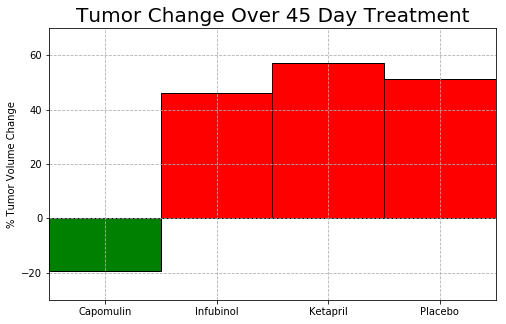

In [230]:
plt.figure(figsize=(8,5))

drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
x_axis2 = np.arange(len(drugs))

# Create a bar chart based upon the above data
cap4 = plt.bar(0, smry_df["Tumor Volume Change (%)"][0], color='g', alpha=1, align="edge", ec="black", width=1)
infu4 = plt.bar(1, smry_df["Tumor Volume Change (%)"][2], color='r', alpha=1, align="edge", ec="black", width=1)
keta4 = plt.bar(2, smry_df["Tumor Volume Change (%)"][3], color='r', alpha=1, align="edge", ec="black", width=1)
plac4 = plt.bar(3, smry_df["Tumor Volume Change (%)"][5], color='r', alpha=1, align="edge", ec="black", width=1)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.5 for value in x_axis2]
plt.xticks(tick_locations, drugs)

# Add limits, title, x/y label, and Grid
plt.xlim(0, 4)
plt.ylim(-30, 70)

plt.title("Tumor Change Over 45 Day Treatment", fontsize=20)
plt.ylabel("% Tumor Volume Change")

plt.grid(linestyle="dashed")

plt.show()